In [50]:
import numpy as np
import scipy
import matplotlib.pyplot as plt 
from numpy.linalg import eig
import matplotlib.animation as animation
from IPython.display import clear_output

# General Parameters
mass_electron = 9.109534e-31 # 1.0 # [kg]
hbar = 6.582119569e-16 # [eV s] source: wikipedia
# length = 100.0 # [??]
number_steps = 500
electric_field = 0.0# 5 #0.01 # Electric field [V/nm]
electron_charge = 1 # 1.60217663e-19 # [C]

In [51]:
# plotting
PLOT_LIMIT = []#400,800]
Y_LIMIT = [] # leave blank for auto
ERROR_BARS = False
PLOT_FITTED = False
split_ = ","
LABEL_FONT_SIZE = 13
TICK_FONT_SIZE = 11
LINE_WIDTH = 0.5
LEGEND = True
label_x = ""
label_y = ""
plot_title = ""
aspect_ratio = [9,9]

colours = [ 'black', 'dimgrey', 'lightslategrey', 'lightsteelblue', 'silver', 'cadetblue', 'darkcyan', 'darkslategray', 'seagreen', 'mediumseagreen', 'darkolivegreen', 'olivedrab', 'olive', 'yellowgreen', 'green', 'springgreen', 'mediumspringgreen', 'turquoise', 'lightseagreen']

def plot_graph(x, y): #create a single plot
    labels = []
    plt.figure()
    plt.rcParams["figure.figsize"] = (aspect_ratio[0],aspect_ratio[1])
    fig, ax = plt.subplots()
    plt.title(plot_title)
    plt.xlabel(label_x, fontsize=LABEL_FONT_SIZE)
    plt.ylabel(label_y,  fontsize=LABEL_FONT_SIZE)
    plt.xticks(fontsize = TICK_FONT_SIZE)
    plt.yticks(fontsize = TICK_FONT_SIZE)
    if(bool(Y_LIMIT) == True):
        plt.ylim(Y_LIMIT)
    if(bool(PLOT_LIMIT) == True):
        plt.xlim(PLOT_LIMIT)
    
    right_side = ax.spines["right"]
    top_side = ax.spines["top"]
    right_side.set_visible(False)
    top_side.set_visible(False)
    plt.plot(x, y, linewidth = LINE_WIDTH, color = 'dimgrey', marker = 's', markersize = 0.5, markerfacecolor='dimgrey')
    plt.grid(True, alpha=0.2)
    #labels = np.array(labels)
    #plt.savefig(f'{file}_figure.png', dpi = 1000, bbox_inches='tight')
    plt.show()

def plot_graphs(x, y): #create a single plot
    labels = []
    plt.figure()
    plt.rcParams["figure.figsize"] = (6,6)
    fig, ax = plt.subplots()
    plt.title(plot_title)
    plt.xlabel(label_x, fontsize=LABEL_FONT_SIZE)
    plt.ylabel(label_y,  fontsize=LABEL_FONT_SIZE)
    #ax.xaxis.set_minor_locator(AutoMinorLocator())
    #plt.xticks(fontsize = TICK_FONT_SIZE)
    #plt.yticks(fontsize = TICK_FONT_SIZE)
    if(bool(Y_LIMIT) == True):
        plt.ylim(Y_LIMIT)
    if(bool(PLOT_LIMIT) == True):
        plt.xlim(PLOT_LIMIT)
    
    right_side = ax.spines["right"]
    top_side = ax.spines["top"]
    right_side.set_visible(False)
    top_side.set_visible(False)
    i=0
    for ys in y:
        if i < len(colours):
            plt.plot(x, ys, linewidth = LINE_WIDTH, marker = 's', markersize = 0.5, color = colours[i])
        else:
            plt.plot(x, ys, linewidth = LINE_WIDTH, marker = 's', markersize = 0.5)
        i+=1
    plt.grid(True, alpha=0.2)
    if(LEGEND==True):
        plt.legend(legend)
    #labels = np.array(labels)
    #plt.savefig(f'{file}_figure.png', dpi = 1000, bbox_inches='tight')
    plt.show()

def make_array(y, number_steps):
    p = np.zeros(number_steps)
    for nr in range(0, number_steps):
        p[nr] = y
    return p

In [52]:
# voigt function details
num_discrete = 2048
func_x = np.zeros(num_discrete)
Gauss_y = np.zeros(num_discrete)
Lorentz_y = np.zeros(num_discrete)
x_0 = num_discrete/2
gamma = 50
sigma = gamma
PLOT_LIMIT=[]

def pad_func_zeros(func):
    func_new = np.zeros(2*len(func))
    j = 0
    for i in range(int(0.25*len(func_new)), int(0.75*len(func_new))):
        func_new[i] = func[j]
        j+=1
    return func_new # twice in length

def pad_func_linear(func):
    func_new = np.zeros(2*len(func))
    j = 0
    del_f = np.abs(func[1]-func[2])
    for i in range(0, int(0.25*len(func_new))):
        func_new[i] = func[0]-0.5*(func[len(func)-1]-func[0]) + i*del_f
    for i in range(int(0.25*len(func_new)), int(0.75*len(func_new))):
        func_new[i] = func[j]
        j+=1
    w=j-1
    j=1
    for i in range(int(0.75*len(func_new)), len(func_new)):
        func_new[i] = func[w] + j*del_f
        j+=1
    return func_new # twice in length

def pad_E(f):
    del_f = np.max(f)/(num_discrete-1)
    func_new = np.zeros(2*len(f))
    j = 0
    for i in range(len(func_new)):
        func_new[i] = del_f*i
    return func_new # twice in length

def convolve(f, g): # PAD ARRAYS BEFORE USE FRO ABSORPTION
    FFT_f = np.fft.fft(f)
    FFT_g = np.fft.fft(g)
    FG = FFT_f * FFT_g
    result = np.fft.ifft(FG)
    return np.real(result)

In [53]:
def read_data(file_name):
    data = []
    with open(file_name, 'r') as file:
        sub_data = []
        for line in file:
            if line.strip():  # Non-empty line
                numbers = [float(num) for num in line.split()]
                sub_data.append(numbers)
            else:  # Empty line indicates end of sub-data
                if sub_data:  # Append only if sub_data is not empty
                    data.append(sub_data)
                    sub_data = []  # Reset sub_data
        if sub_data:  # Append the last sub_data
            data.append(sub_data)
    return data

voigt half width: 30.09281875915974


<Figure size 400x400 with 0 Axes>

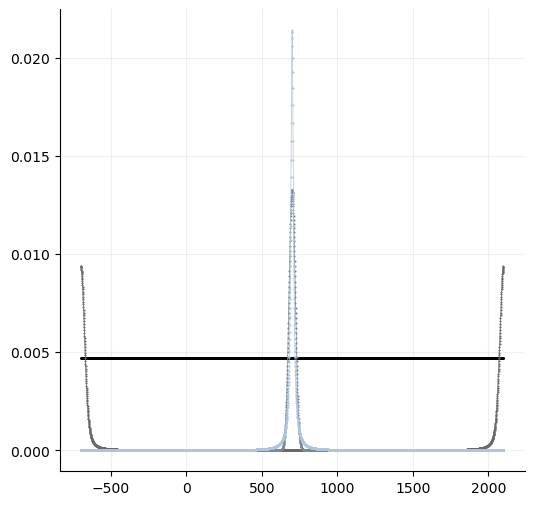

In [17]:
data = []
legend = []

num_discrete = 2048 # Base 2 for FFT
func_x = np.zeros(num_discrete)
Gauss_y = np.zeros(num_discrete)
Lorentz_y = np.zeros(num_discrete)
x_0 = num_discrete/2
gamma = 30

WL_range=[0,1400]
PLOT_LIMIT=WL_range
delta_WL = (WL_range[1]-WL_range[0]) / (num_discrete-1)
epsilon = delta_WL*0.5
sigma = gamma

for i in range(num_discrete):
    func_x[i] = i
    Gauss_y[i] = 1.0/np.sqrt(np.sqrt(2*np.pi)*sigma)*np.exp(-(func_x[i]-x_0)*(func_x[i]-x_0)/(2.0*sigma*sigma))
    Lorentz_y[i] = 1.0/np.pi * 0.5*gamma/((func_x[i]-x_0)**2 + (0.5*gamma)**2)

Gauss_y = Gauss_y/abs(sum(Gauss_y))
Lorentz_y = Lorentz_y/abs(sum(Lorentz_y))
func_x_new = pad_func_linear(func_x)
WL_xaxis = np.zeros(num_discrete)
for i in range(num_discrete):
    WL_xaxis[i] = WL_range[0]+i*delta_WL
WL_axis_new = pad_func_linear(WL_xaxis) # for plotting
Lorentz_y_new = pad_func_zeros(Lorentz_y)
Gauss_y_new = pad_func_zeros(Gauss_y)
voigt_y = convolve(Lorentz_y_new, Gauss_y_new)
N_V = abs(sum(voigt_y))
#voigt_y = voigt_y


target_value = max(voigt_y)/2
closest_value = np.unravel_index(np.argmin(np.abs(voigt_y - target_value), axis=None), voigt_y.shape)
print("voigt half width: " + str(abs(WL_axis_new[0]-WL_axis_new[closest_value])))


PLOT_LIMIT=[]
LEGEND=False
label_x = ""
label_y = ""
plot_title = ""
plot_graphs(WL_axis_new, [make_array(target_value, int(len(voigt_y))), voigt_y, Gauss_y_new, Lorentz_y_new])

<Figure size 400x400 with 0 Axes>

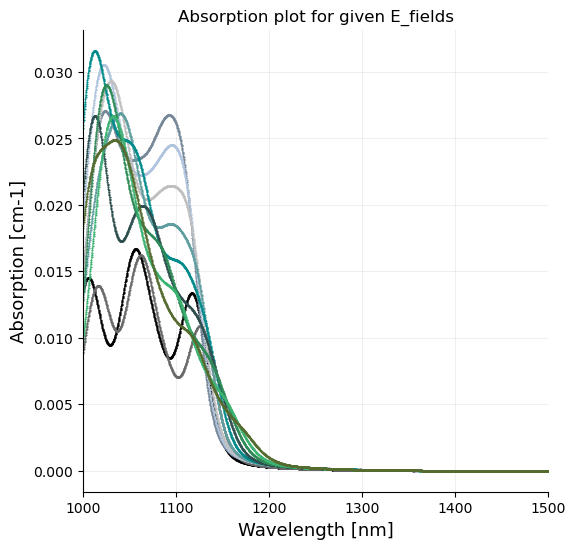

In [56]:
data = []
legend = []

num_discrete = 2048 # Base 2 for FFT
func_x = np.zeros(num_discrete)
Gauss_y = np.zeros(num_discrete)
Lorentz_y = np.zeros(num_discrete)
x_0 = num_discrete/2
#gamma = 55

#WL_range=[1000,1400]
PLOT_LIMIT=WL_range
delta_WL = (WL_range[1]-WL_range[0]) / (num_discrete-1)
epsilon = delta_WL*0.5
sigma = gamma

for i in range(num_discrete):
    func_x[i] = i
    Gauss_y[i] = 1.0/np.sqrt(np.sqrt(2*np.pi)*sigma)*np.exp(-(func_x[i]-x_0)*(func_x[i]-x_0)/(2.0*sigma*sigma))
    Lorentz_y[i] = 1.0/np.pi * 0.5*gamma/((func_x[i]-x_0)**2 + (0.5*gamma)**2)

Gauss_y = Gauss_y/abs(sum(Gauss_y))
Lorentz_y = Lorentz_y/abs(sum(Lorentz_y))
func_x_new = pad_func_linear(func_x)
WL_xaxis = np.zeros(num_discrete)
for i in range(num_discrete):
    WL_xaxis[i] = WL_range[0]+i*delta_WL
WL_axis_new = pad_func_linear(WL_xaxis) # for plotting
Lorentz_y_new = pad_func_zeros(Lorentz_y)
Gauss_y_new = pad_func_zeros(Gauss_y)
voigt_y = convolve(Lorentz_y_new, Gauss_y_new)
N_V = abs(sum(voigt_y))
#voigt_y = voigt_y


target_value = max(voigt_y)/2
closest_value = np.unravel_index(np.argmin(np.abs(voigt_y - target_value), axis=None), voigt_y.shape)
print("voigt half width: " + str(abs(WL_axis_new[0]-WL_axis_new[closest_value])))


PLOT_LIMIT=[]
Y_LIMIT = []
LEGEND=False
label_x = ""
label_y = ""
plot_title = ""
plot_graphs(WL_axis_new, [make_array(target_value, int(len(voigt_y))), voigt_y, Gauss_y_new, Lorentz_y_new])




# ----------------------------------

number_runs = 11
delta_field = 0.002

# ----------------------------------

print("Starting..")
Y_LIMIT = []
for i in range(number_runs):
    print("Analysing file: "+str(i+1)+" / "+str(number_runs))
    electric_field = i*delta_field
    I_squared_matrix_data = read_data("I_squared_matrix_"+str(i)+".txt")
    E_GAP_WL_data = read_data("E_GAP_WL_"+str(i)+".txt")
    I_squared_matrix_data = np.array(I_squared_matrix_data)
    E_GAP_WL_data = np.array(E_GAP_WL_data)

    absorption_yaxis = np.zeros(num_discrete)

    count = 0
    for i in range(num_discrete):
        target_value = WL_xaxis[i]
        closest_value = np.unravel_index(np.argmin(np.abs(E_GAP_WL_data - target_value), axis=None), E_GAP_WL_data.shape)
        prox_check = E_GAP_WL_data[closest_value[0]][closest_value[1]][closest_value[2]]
        if(prox_check < target_value+epsilon and prox_check > target_value-epsilon):
            absorption_yaxis[i] = I_squared_matrix_data[closest_value[0]][closest_value[1]][closest_value[2]]
            if closest_value[2] == 1: # Heavy hole transitions triple weighted
                absorption_yaxis[i]*=3
            count += 1

    label_x = "Wavelength [nm]"
    label_y = "Overlap Integral [AU]"
    plot_title = "Current delta space"

    absorption_yaxis_new = pad_func_zeros(absorption_yaxis)     
    absorption = convolve(absorption_yaxis_new,voigt_y)
    data.append(absorption)
    clear_output(wait=True)
    aspect_ratio=[4,4]
    plot_graph(WL_axis_new, absorption_yaxis_new)
    legend.append(str(electric_field) + "V/nm")

clear_output(wait=True)

PLOT_LIMIT=WL_range
Y_LIMIT = []
label_x = "Wavelength [nm]"
label_y = "Absorption [cm-1]"
plot_title = "Absorption plot for given E_fields"
plot_graphs(WL_axis_new, data)

<Figure size 600x600 with 0 Axes>

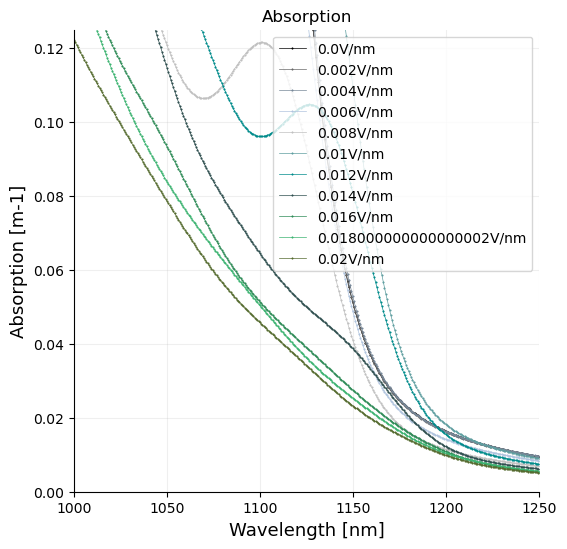

In [31]:
PLOT_LIMIT=[1000,1250]
Y_LIMIT = [0,0.125]
label_x = "Wavelength [nm]"
label_y = "Absorption [m-1]"
plot_title = "Absorption"
LEGEND=True
plot_graphs(WL_axis_new, data)

C:\Users\jmcc0\AppData\Local\Temp\ipykernel_1152\1360469486.py:9: RuntimeWarning: divide by zero encountered in double_scalars
  FOM[k][j] = ( - data[0][j]  / data[k+1][j] ) + 1
C:\Users\jmcc0\AppData\Local\Temp\ipykernel_1152\1360469486.py:9: RuntimeWarning: invalid value encountered in double_scalars
  FOM[k][j] = ( - data[0][j]  / data[k+1][j] ) + 1


<Figure size 600x600 with 0 Axes>

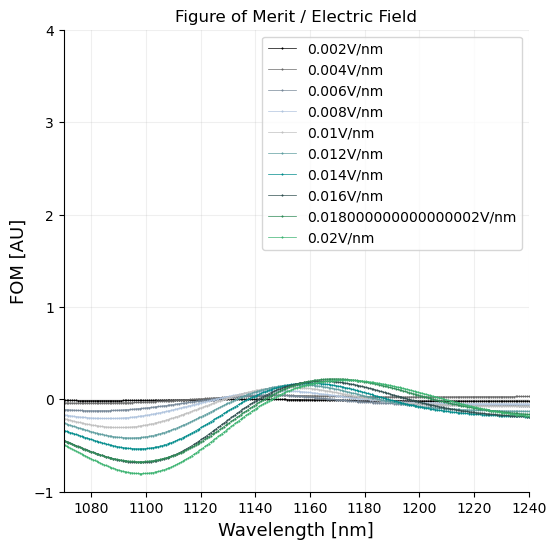

<Figure size 600x600 with 0 Axes>

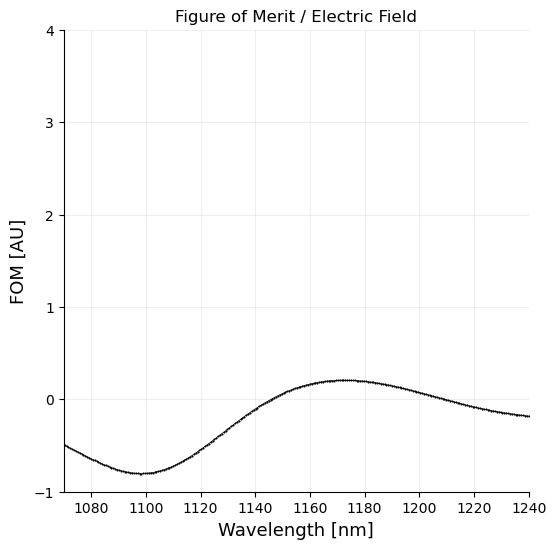

In [27]:
# Figure of Merit Plots ::
PLOT_LIMIT=[1070,1240]
legend=[]
FOM = np.zeros((len(data)-1,len(data[0])))
for k in range(len(data)-1):
    electric_field = (k+1)*delta_field
    legend.append(str(electric_field) + "V/nm")
    for j in range(len(data[0])):
        FOM[k][j] = ( - data[0][j]  / data[k+1][j] ) + 1
        
        
LEGEND=True
label_x = "Wavelength [nm]"
label_y = "FOM [AU]"
plot_title = "Figure of Merit / Electric Field"
Y_LIMIT=[-1,4]

plot_graphs(WL_axis_new, FOM)
LEGEND=False
plot_graphs(WL_axis_new, FOM[9:10])

Analysing file: 1 / 11
Analysing file: 2 / 11
Analysing file: 3 / 11
Analysing file: 4 / 11
Analysing file: 5 / 11
Analysing file: 6 / 11
Analysing file: 7 / 11
Analysing file: 8 / 11
Analysing file: 9 / 11
Analysing file: 10 / 11
Analysing file: 11 / 11


<Figure size 600x600 with 0 Axes>

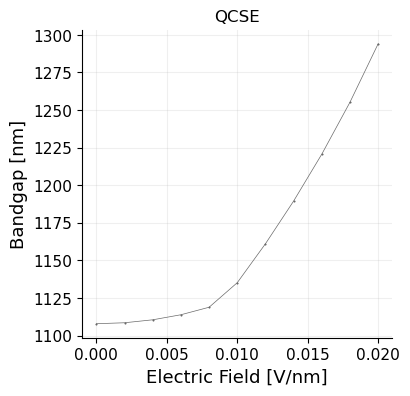

In [16]:
x_axis = np.zeros(number_runs)
y_axis = np.zeros(number_runs)
for i in range(number_runs):
    print("Analysing file: "+str(i+1)+" / "+str(number_runs))
    x_axis[i] = i*delta_field
    E_GAP_WL_data = read_data("E_GAP_WL_"+str(i)+".txt")
    E_GAP_WL_data = np.array(E_GAP_WL_data)
    y_axis[i] = max(E_GAP_WL_data[0][0][j] for j in range(2))

label_y="Bandgap [nm]"
label_x="Electric Field [V/nm]"
plot_title = "QCSE"
Y_LIMIT = []
PLOT_LIMIT=[]
plot_graph(x_axis,y_axis)

In [132]:
def show_results(number_runs):
    data = []
    legend = []

    num_discrete = 2048 # Base 2 for FFT
    func_x = np.zeros(num_discrete)
    Gauss_y = np.zeros(num_discrete)
    Lorentz_y = np.zeros(num_discrete)
    x_0 = num_discrete/2
    #gamma = 55
    WL_of_interest=[1450,1600]
    #WL_range=[1000,1400]
    PLOT_LIMIT = WL_of_interest
    delta_WL = (WL_range[1]-WL_range[0]) / (num_discrete-1)
    epsilon = delta_WL*0.5
    sigma = gamma

    for i in range(num_discrete):
        func_x[i] = i
        Gauss_y[i] = 1.0/np.sqrt(np.sqrt(2*np.pi)*sigma)*np.exp(-(func_x[i]-x_0)*(func_x[i]-x_0)/(2.0*sigma*sigma))
        Lorentz_y[i] = 1.0/np.pi * 0.5*gamma/((func_x[i]-x_0)**2 + (0.5*gamma)**2)

    Gauss_y = Gauss_y/abs(sum(Gauss_y))
    Lorentz_y = Lorentz_y/abs(sum(Lorentz_y))
    func_x_new = pad_func_linear(func_x)
    WL_xaxis = np.zeros(num_discrete)
    for i in range(num_discrete):
        WL_xaxis[i] = WL_range[0]+i*delta_WL
    WL_axis_new = pad_func_linear(WL_xaxis) # for plotting
    Lorentz_y_new = pad_func_zeros(Lorentz_y)
    Gauss_y_new = pad_func_zeros(Gauss_y)
    voigt_y = convolve(Lorentz_y_new, Gauss_y_new)
    N_V = abs(sum(voigt_y))
    #voigt_y = voigt_y


    target_value = max(voigt_y)/2
    closest_value = np.unravel_index(np.argmin(np.abs(voigt_y - target_value), axis=None), voigt_y.shape)
    print("voigt half width: " + str(abs(WL_axis_new[0]-WL_axis_new[closest_value])))


    PLOT_LIMIT = WL_of_interest
    Y_LIMIT = []
    LEGEND=False
    label_x = ""
    label_y = ""
    plot_title = ""
    plot_graphs(WL_axis_new, [make_array(target_value, int(len(voigt_y))), voigt_y, Gauss_y_new, Lorentz_y_new])
    print("Starting..")
    Y_LIMIT = []
    for i in range(number_runs):
        delta_field = max_electric_field / num_electric_fields
        print("Analysing file: "+str(i+1)+" / "+str(number_runs))
        electric_field = i*delta_field
        I_squared_matrix_data = read_data("I_squared_matrix_"+str(i)+".txt")
        E_GAP_WL_data = read_data("E_GAP_WL_"+str(i)+".txt")
        I_squared_matrix_data = np.array(I_squared_matrix_data)
        E_GAP_WL_data = np.array(E_GAP_WL_data)

        absorption_yaxis = np.zeros(num_discrete)

        count = 0
        for i in range(num_discrete):
            target_value = WL_xaxis[i]
            closest_value = np.unravel_index(np.argmin(np.abs(E_GAP_WL_data - target_value), axis=None), E_GAP_WL_data.shape)
            prox_check = E_GAP_WL_data[closest_value[0]][closest_value[1]][closest_value[2]]
            if(prox_check < target_value+epsilon and prox_check > target_value-epsilon):
                absorption_yaxis[i] = I_squared_matrix_data[closest_value[0]][closest_value[1]][closest_value[2]]
                count += 1

        label_x = "Wavelength [nm]"
        label_y = "Overlap Integral [AU]"
        plot_title = "Current delta space"

        absorption_yaxis_new = pad_func_zeros(absorption_yaxis)     
        absorption = convolve(absorption_yaxis_new,voigt_y)
        data.append(absorption)
        clear_output(wait=True)
        aspect_ratio=[4,4]
        plot_graph(WL_axis_new, absorption_yaxis_new)
        legend.append(str(electric_field) + "V/nm")

    clear_output(wait=True)

    PLOT_LIMIT=WL_of_interest
    Y_LIMIT = []
    label_x = "Wavelength [nm]"
    label_y = "Absorption [cm-1]"
    plot_title = "Absorption plot for given E_fields"
    plot_graphs(WL_axis_new, data)
    
    x_axis = np.zeros(number_runs)
    y_axis = np.zeros(number_runs)
    for i in range(number_runs):
        print("Analysing file: "+str(i+1)+" / "+str(number_runs))
        x_axis[i] = i*delta_field
        E_GAP_WL_data = read_data("E_GAP_WL_"+str(i)+".txt")
        E_GAP_WL_data = np.array(E_GAP_WL_data)
        y_axis[i] = max(E_GAP_WL_data[0][0][j] for j in range(2))

    label_y="Bandgap [nm]"
    label_x="Electric Field [V/nm]"
    plot_title = "QCSE"
    Y_LIMIT = []
    PLOT_LIMIT=[]
    plot_graph(x_axis,y_axis)
    legend=[]
    
    FOM = np.zeros((len(data)-1,len(data[0])))
    max_FOM = np.zeros(number_runs)
    for k in range(len(data)-1):
        electric_field = (k+1)*delta_field
        legend.append(str(electric_field) + "V/nm")
        for j in range(len(data[0])):
            FOM[k][j] = ( - data[0][j]  / data[k+1][j] ) + 1
    
    # Assuming num1 and num2 are the bounds of interest
    num1 = WL_of_interest[0]  # lower bound
    num2 = WL_of_interest[1]  # upper bound

    # Find indices corresponding to num1 and num2 in WL_axis_new
    idx_num1 = np.where(WL_axis_new >= num1)[0][0]
    idx_num2 = np.where(WL_axis_new <= num2)[0][-1]

    # Extract the wavelengths within the bounds
    wavelengths_within_bounds = WL_axis_new[idx_num1:idx_num2+1]

    # Initialize arrays to store results
    max_FOM_values = np.zeros(FOM.shape[0])  # One value for each row
    wavelengths_of_max_FOM = np.zeros(FOM.shape[0])  # One value for each row

    # Iterate over each row of FOM
    for i in range(FOM.shape[0]):
        # Extract FOM values within the bounds for the current row
        FOM_within_bounds = FOM[i, idx_num1:idx_num2+1]

        # Find the maximum FOM value and its index within the bounds
        max_FOM_value = np.max(FOM_within_bounds)
        max_FOM_index_within_bounds = np.argmax(FOM_within_bounds)

        # Find the corresponding wavelength for the maximum FOM within the bounds
        wavelength_of_max_FOM = wavelengths_within_bounds[max_FOM_index_within_bounds]

        # Store the results for the current row
        max_FOM_values[i] = max_FOM_value
        wavelengths_of_max_FOM[i] = wavelength_of_max_FOM

    # Find the overall maximum FOM value and its corresponding wavelength
    overall_max_FOM_value = np.max(max_FOM_values)
    overall_max_FOM_index = np.argmax(max_FOM_values)
    overall_wavelength_of_max_FOM = wavelengths_of_max_FOM[overall_max_FOM_index]

    # Print the results
    print("Overall maximum FOM value:", overall_max_FOM_value)
    print("Corresponding wavelength:", overall_wavelength_of_max_FOM)   
    # FOM_DATA_QWI_y.append(overall_max_FOM_value)

    LEGEND=True
    PLOT_LIMIT=WL_of_interest
    label_x = "Wavelength [nm]"
    label_y = "FOM [AU]"
    plot_title = "Figure of Merit / Electric Field"
    Y_LIMIT=[-1,4]

    plot_graphs(WL_axis_new, FOM)
    LEGEND=False
    #plot_graphs(WL_axis_new, FOM[9:10])
    
    return overall_max_FOM_value

In [141]:
def write_simulation_parameters(inter_mixing_params, num_electric_fields, max_electric_field):
    with open('simulation_parameters.txt', 'w') as f:
        f.write(f"{inter_mixing_params[0]} {inter_mixing_params[1]}\n")
        f.write(f"{num_electric_fields}\n")
        f.write(f"{max_electric_field}\n")

class Layer:
    def __init__(self, material, thickness): # thickness in [A]
        self.material = material
        self.thickness = thickness

class Material:
    def __init__(self, name, affinity, band_gap, e_eff_mass, lh_eff_mass, hh_eff_mass):
        self.affinity = affinity
        self.band_gap = band_gap
        self.e_eff_mass = e_eff_mass
        self.lh_eff_mass = lh_eff_mass
        self.hh_eff_mass = hh_eff_mass
        self.name = name
        
    def getEffectiveMass(self, p):
        if p == 0:
            return self.e_eff_mass
        if p == 1:
            return self.lh_eff_mass
        if p == 2:
            return self.hh_eff_mass
        
    def getBandgap(self):
        return self.band_gap
    
# Example Materials // BG = Bandgap, EF = Effective Electron Affinity for placing bands [REF: Takuya IEEE Quantum Electronics Vol 30, NO.2]
# Decleration: Material(EF, BG, e_eff_mass, lh_eff_mass, hh_eff_mass) 
GaAs = Material("GaAs", 0.111, 1.42, 0.063, 0.082, 0.51)
GaP = Material("GaP", -0.388, 2.74, 0.25, 0.14, 0.67)
InP = Material("InP", 0.0, 1.35, 0.077, 0.14, 0.6)
InAs = Material("InAs", 0.441, 0.354, 0.023, 0.026, 0.41)
AlAs = Material("AlAs", 2.5255, 2.12, 0.15, 0.16, 0.79) # This is true (verified)

# Simulation setup :: InGaAlAs
alloys = []
def BG_InGaAlAs(x, y):
    return 0.36 + 2.093*y + 0.629*x + 0.577*y*y + 0.436*x*x + 1.013*x*y - 2.0*x*y*(1-x-y); # [eV]
def EF_InGaAlAs(x, y): # Effective electron finity for placing conduction bands InGaAlAs
    return 0.5766 - 0.3439*BG_InGaAlAs(x, y) # [eV] 
def effMass_InGaAlAs(x, y, particle):
    return InAs.getEffectiveMass(particle)*(1-x-y) + GaAs.getEffectiveMass(particle)*(x) + AlAs.getEffectiveMass(particle)*(y);
def new_InGaAlAs_material(x, y):
    temp = Material("In{}Ga{}Al{}As".format(1-x-y,x,y), EF_InGaAlAs(x, y), BG_InGaAlAs(x, y), effMass_InGaAlAs(x, y, 0), effMass_InGaAlAs(x, y, 1), effMass_InGaAlAs(x, y, 2))
    alloys.append(temp)
    return temp
    
# new_InGaAlAs_material(0.124, 0.245)
# new_InGaAlAs_material(0.30, 0.12)
materials = [GaAs, GaP, InP, InAs, AlAs]
# Write materials and layers information to files

layer1 = Layer(InP, 60)
layer2 = Layer(new_InGaAlAs_material(0.124, 0.245), 50)
layer3 = Layer(new_InGaAlAs_material(0.05, 0.15), 90)
layers = [layer1, layer3, layer1]

with open('input.txt', 'w') as f:
    f.write(str(int(len(layers))) + "\n")
    for layer in layers:
        f.write(str(layer.material.name) + " " + str(layer.thickness) + "\n")

with open('materials.txt', 'w') as f:
    for material in materials:
        f.write(material.name + " " + str(material.affinity) + " " + str(material.band_gap) + " " + str(material.e_eff_mass) + " " + str(material.lh_eff_mass) + " " + str(material.hh_eff_mass) + "\n")
    for material in alloys:
        f.write(material.name + " " + str(material.affinity) + " " + str(material.band_gap) + " " + str(material.e_eff_mass) + " " + str(material.lh_eff_mass) + " " + str(material.hh_eff_mass) + "\n")


In [127]:
FOM_DATA_QWI_x = []
FOM_DATA_QWI_y = []

QWI_params = ["True", 40]
num_electric_fields = 1
max_electric_field = 15
write_simulation_parameters(QWI_params, num_electric_fields, max_electric_field)

import subprocess
# Run the C++ executable with material and layer files
subprocess.run(['simulation.exe'])
WL_range=[1000,1500]
WL_of_interest=[1100,1200]
show_results(num_electric_fields+1)

KeyboardInterrupt: 

<Figure size 400x400 with 0 Axes>

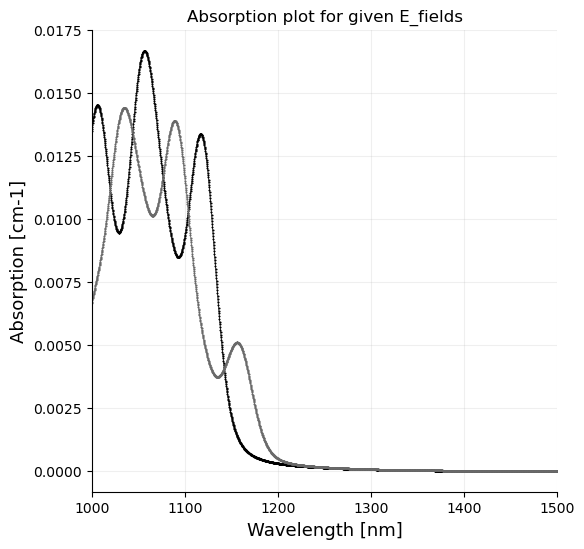

Analysing file: 1 / 2
Analysing file: 2 / 2


<Figure size 600x600 with 0 Axes>

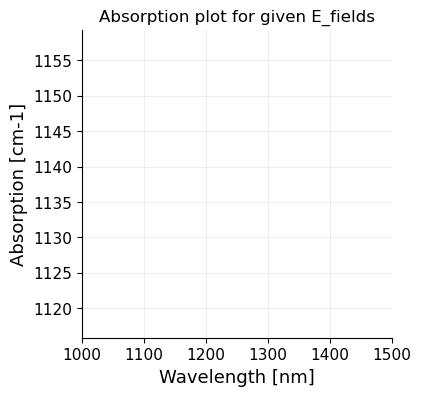

Overall maximum FOM value: 0.8133399391730092
Corresponding wavelength: 1167.3180263800684


C:\Users\jmcc0\AppData\Local\Temp\ipykernel_23800\2969999854.py:117: RuntimeWarning: divide by zero encountered in double_scalars
  FOM[k][j] = ( - data[0][j]  / data[k+1][j] ) + 1
C:\Users\jmcc0\AppData\Local\Temp\ipykernel_23800\2969999854.py:117: RuntimeWarning: invalid value encountered in double_scalars
  FOM[k][j] = ( - data[0][j]  / data[k+1][j] ) + 1


<Figure size 400x400 with 0 Axes>

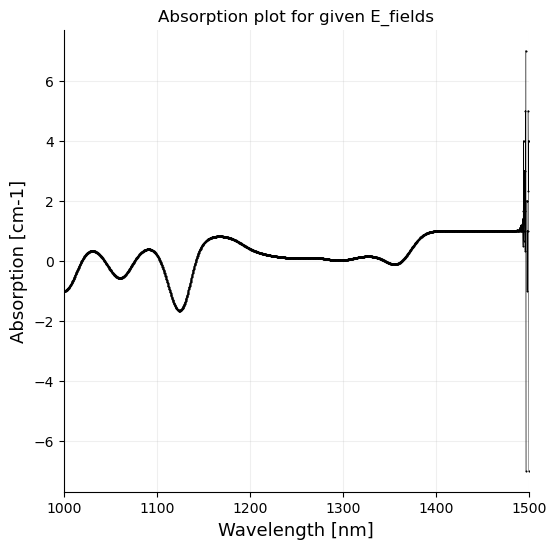

<Figure size 600x600 with 0 Axes>

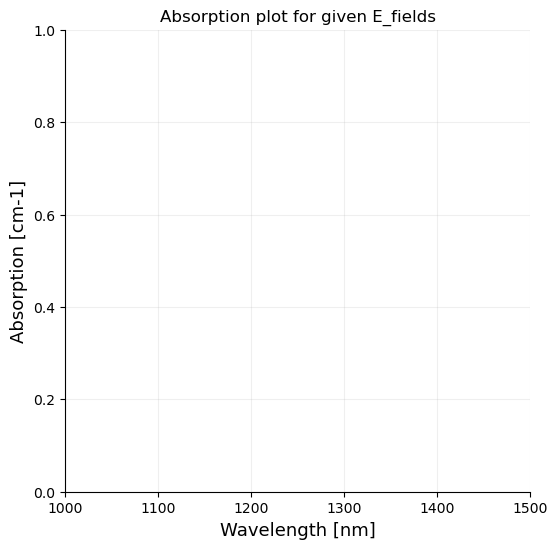

In [71]:
FOM_DATA_QWI_x = []
FOM_DATA_QWI_y = []
legend=[]
WL_of_interest=[1100,1200]
show_results(num_electric_fields+1)

<Figure size 400x400 with 0 Axes>

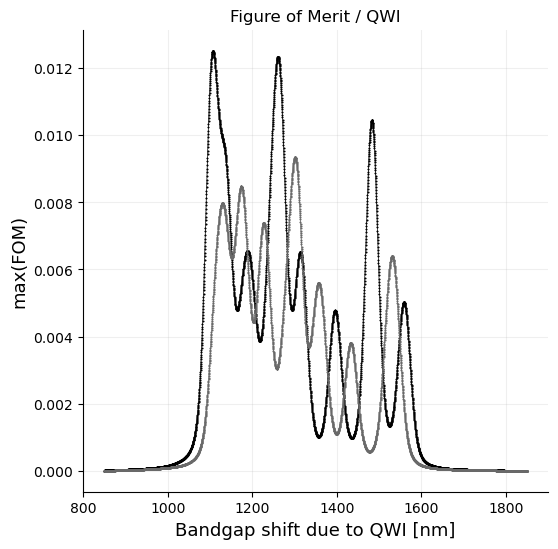

Analysing file: 1 / 2
Analysing file: 2 / 2


<Figure size 600x600 with 0 Axes>

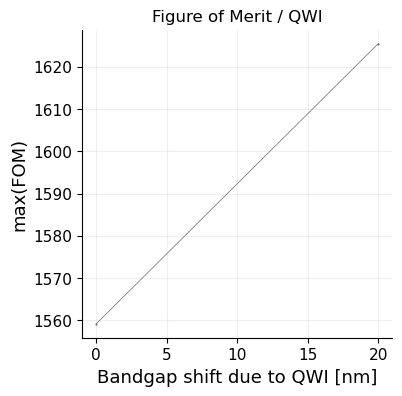

Overall maximum FOM value: 0.7813396063813108
Corresponding wavelength: 1526.47777234978


<Figure size 400x400 with 0 Axes>

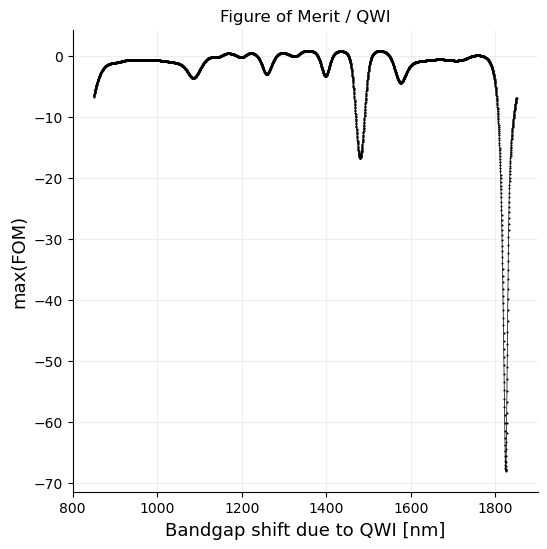

In [213]:
FOM_DATA_QWI_x = []
FOM_DATA_QWI_y = []
FOM_DATA_QWI_y_all = []
max_shift = 50
num_runs = 20
num_electric_fields = 1 # simulation cxx - not python
max_electric_field = 20
num_fields = 5

for k in range(num_fields):
    FOM_DATA_QWI_y = []
    for j in range(num_runs):
        wavelength_shift = max_shift/num_runs + j*max_shift/num_runs
        QWI_params = ["True", wavelength_shift]
        FOM_DATA_QWI_x.append(wavelength_shift)
        write_simulation_parameters(QWI_params, num_electric_fields, max_electric_field/num_fields+k*max_electric_field/num_fields)

        # Run the C++ executable with material and layer files
        subprocess.run(['simulation.exe'])
        WL_range=[1100,1600]
        WL_of_interest=[1450,1650]
        FOM_DATA_QWI_y.append(show_results(num_electric_fields+1))
    FOM_DATA_QWI_y_all.append(FOM_DATA_QWI_y)

<Figure size 400x400 with 0 Axes>

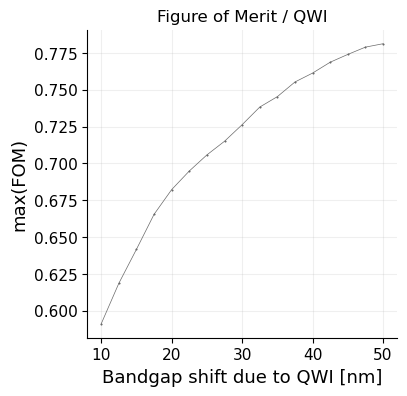

In [152]:
PLOT_LIMIT=[]
label_x = "Bandgap shift due to QWI [nm]"
label_y = "max(FOM)"
plot_title = "Figure of Merit / QWI"
plot_graph(FOM_DATA_QWI_x[3:20], FOM_DATA_QWI_y[3:20])

In [212]:

max_shift = 50
num_runs = 20
num_electric_fields = 1 # simulation
max_electric_field = 20
num_fields = 5
FOM_DATA_QWI_x = []
FOM_DATA_QWI_y = []
FOM_DATA_QWI_y_all = []

In [203]:
FOM_DATA_QWI_y.append(1)

In [204]:
FOM_DATA_QWI_y

[1, 1, 1]

In [210]:
FOM_DATA_QWI_y_all.append(FOM_DATA_QWI_y)

In [214]:
FOM_DATA_QWI_y_all

[[0.07608883195424998,
  0.08595376305579305,
  0.08716297050062738,
  0.03574803424652084,
  0.041629823715571335,
  0.07730145820722445,
  0.0815951419842218,
  0.08500604460525585,
  0.11682822895969047,
  0.1504217876308822,
  0.16456772296541744,
  0.17181862195658526,
  0.18702355935231385,
  0.19805792575259185,
  0.18702506925320006,
  0.18840482400338265,
  0.18970408508543368,
  0.17423849300543226,
  0.17521222380769585,
  0.17605375566044712],
 [0.3252199566062104,
  0.346762106963892,
  0.3550971896990872,
  0.2577562152092632,
  0.27312442961721384,
  0.2857901516109349,
  0.29654180431761323,
  0.3110544792999801,
  0.3235841135381249,
  0.3467197839344446,
  0.3783140050555194,
  0.4371361042828722,
  0.486126762382024,
  0.5240847716852752,
  0.5360129877205674,
  0.5469727501864099,
  0.545095670744218,
  0.5384669120549899,
  0.5315264272808691,
  0.5331740229551691],
 [0.6581094555309499,
  0.6655162804342363,
  0.672371509731328,
  0.5289664059577441,
  0.547805266

<Figure size 600x600 with 0 Axes>

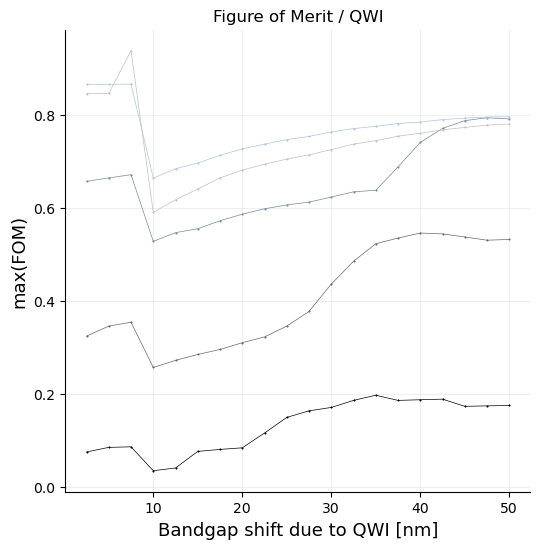

In [218]:
plot_graphs(FOM_DATA_QWI_x[0:20], FOM_DATA_QWI_y_all)